In [14]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12,6)

Backtest our first strategy
Install fastquant
It’s as simple as using pip install!


In [15]:
# run this from jupyter this way
# !pip install fastquant

Get stock data
Import the get_stock_data function from fastquant and use it to pull the stock data of Jollibee Food Corp. (JFC) from January 1, 2018 to January 1, 2019. Notice that we have columns corresponding to the date (dt), and closing price (close).


In [17]:
from fastquant import get_stock_data
jfc = get_stock_data("JFC", "2018-01-01", "2020-01-01")

[*********************100%***********************]  1 of 1 completed


In [18]:
print(jfc.head())

            close
dt               
2018-01-03  255.4
2018-01-04  255.0
2018-01-05  255.0
2018-01-08  256.0
2018-01-09  255.8


## Backtest your trading strategy


Backtest a simple moving average crossover (SMAC) strategy through the historical stock data of Jollibee Food Corp. (JFC) using the backtest function of fastquant.
In an SMAC strategy, fast period (fast_period) refers to the period used for the fast moving average, while slow period (slow_period) refers to the period used for the slow moving average. When the fast moving average crosses over the slow moving average from below to go above, this is considered a “buy” signal, while if it crosses over from above to go below, this is considered a “sell” signal. For more information on how this works, please check out the explanation in one of my previous [articles](https://towardsdatascience.com/access-philippine-stock-data-with-only-2-lines-of-python-309780382b8d).
To start out, let’s initialize the fast_period and slow_period as 15, and 40, respectively.
You should see the final portfolio value below at the bottom of the logs. This value can be interpreted as how much money your portfolio would have been worth at the end of the backtesting period (in this case January 1, 2020). If you get the difference between your “Final Portfolio Value” and your “Starting Portfolio Value”, this will be your expected earnings for that same period based on your backtest (in this case PHP 411.83).

Starting Portfolio Value: 100000.00
2019-12-27, ===Global level arguments===
2019-12-27, init_cash : 100000
2019-12-27, buy_prop : 1
2019-12-27, sell_prop : 1
2019-12-27, commission : 0.0075
2019-12-27, stop_loss : 0
2019-12-27, stop_trail : 0
===Strategy level arguments===
fast_period : 15
slow_period : 40
2019-12-27, Final Portfolio Value: 74062.56749999995
2019-12-27, Final PnL: -25937.43
Time used (seconds): 0.17333102226257324
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['smac']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	commission:0.0075	stop_loss:0	stop_trail:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add_cash_amount:0	add_cash_freq:M	fast_period:15	slow_period:40
Returns	rtot:-0.30025994326665206	ravg:-0.0006178188133058684	rnorm:-0.14417583696203218	rnorm100:-14.417583696203218
Sharpe	sharperatio:-0.91473168986

<IPython.core.display.Javascript object>


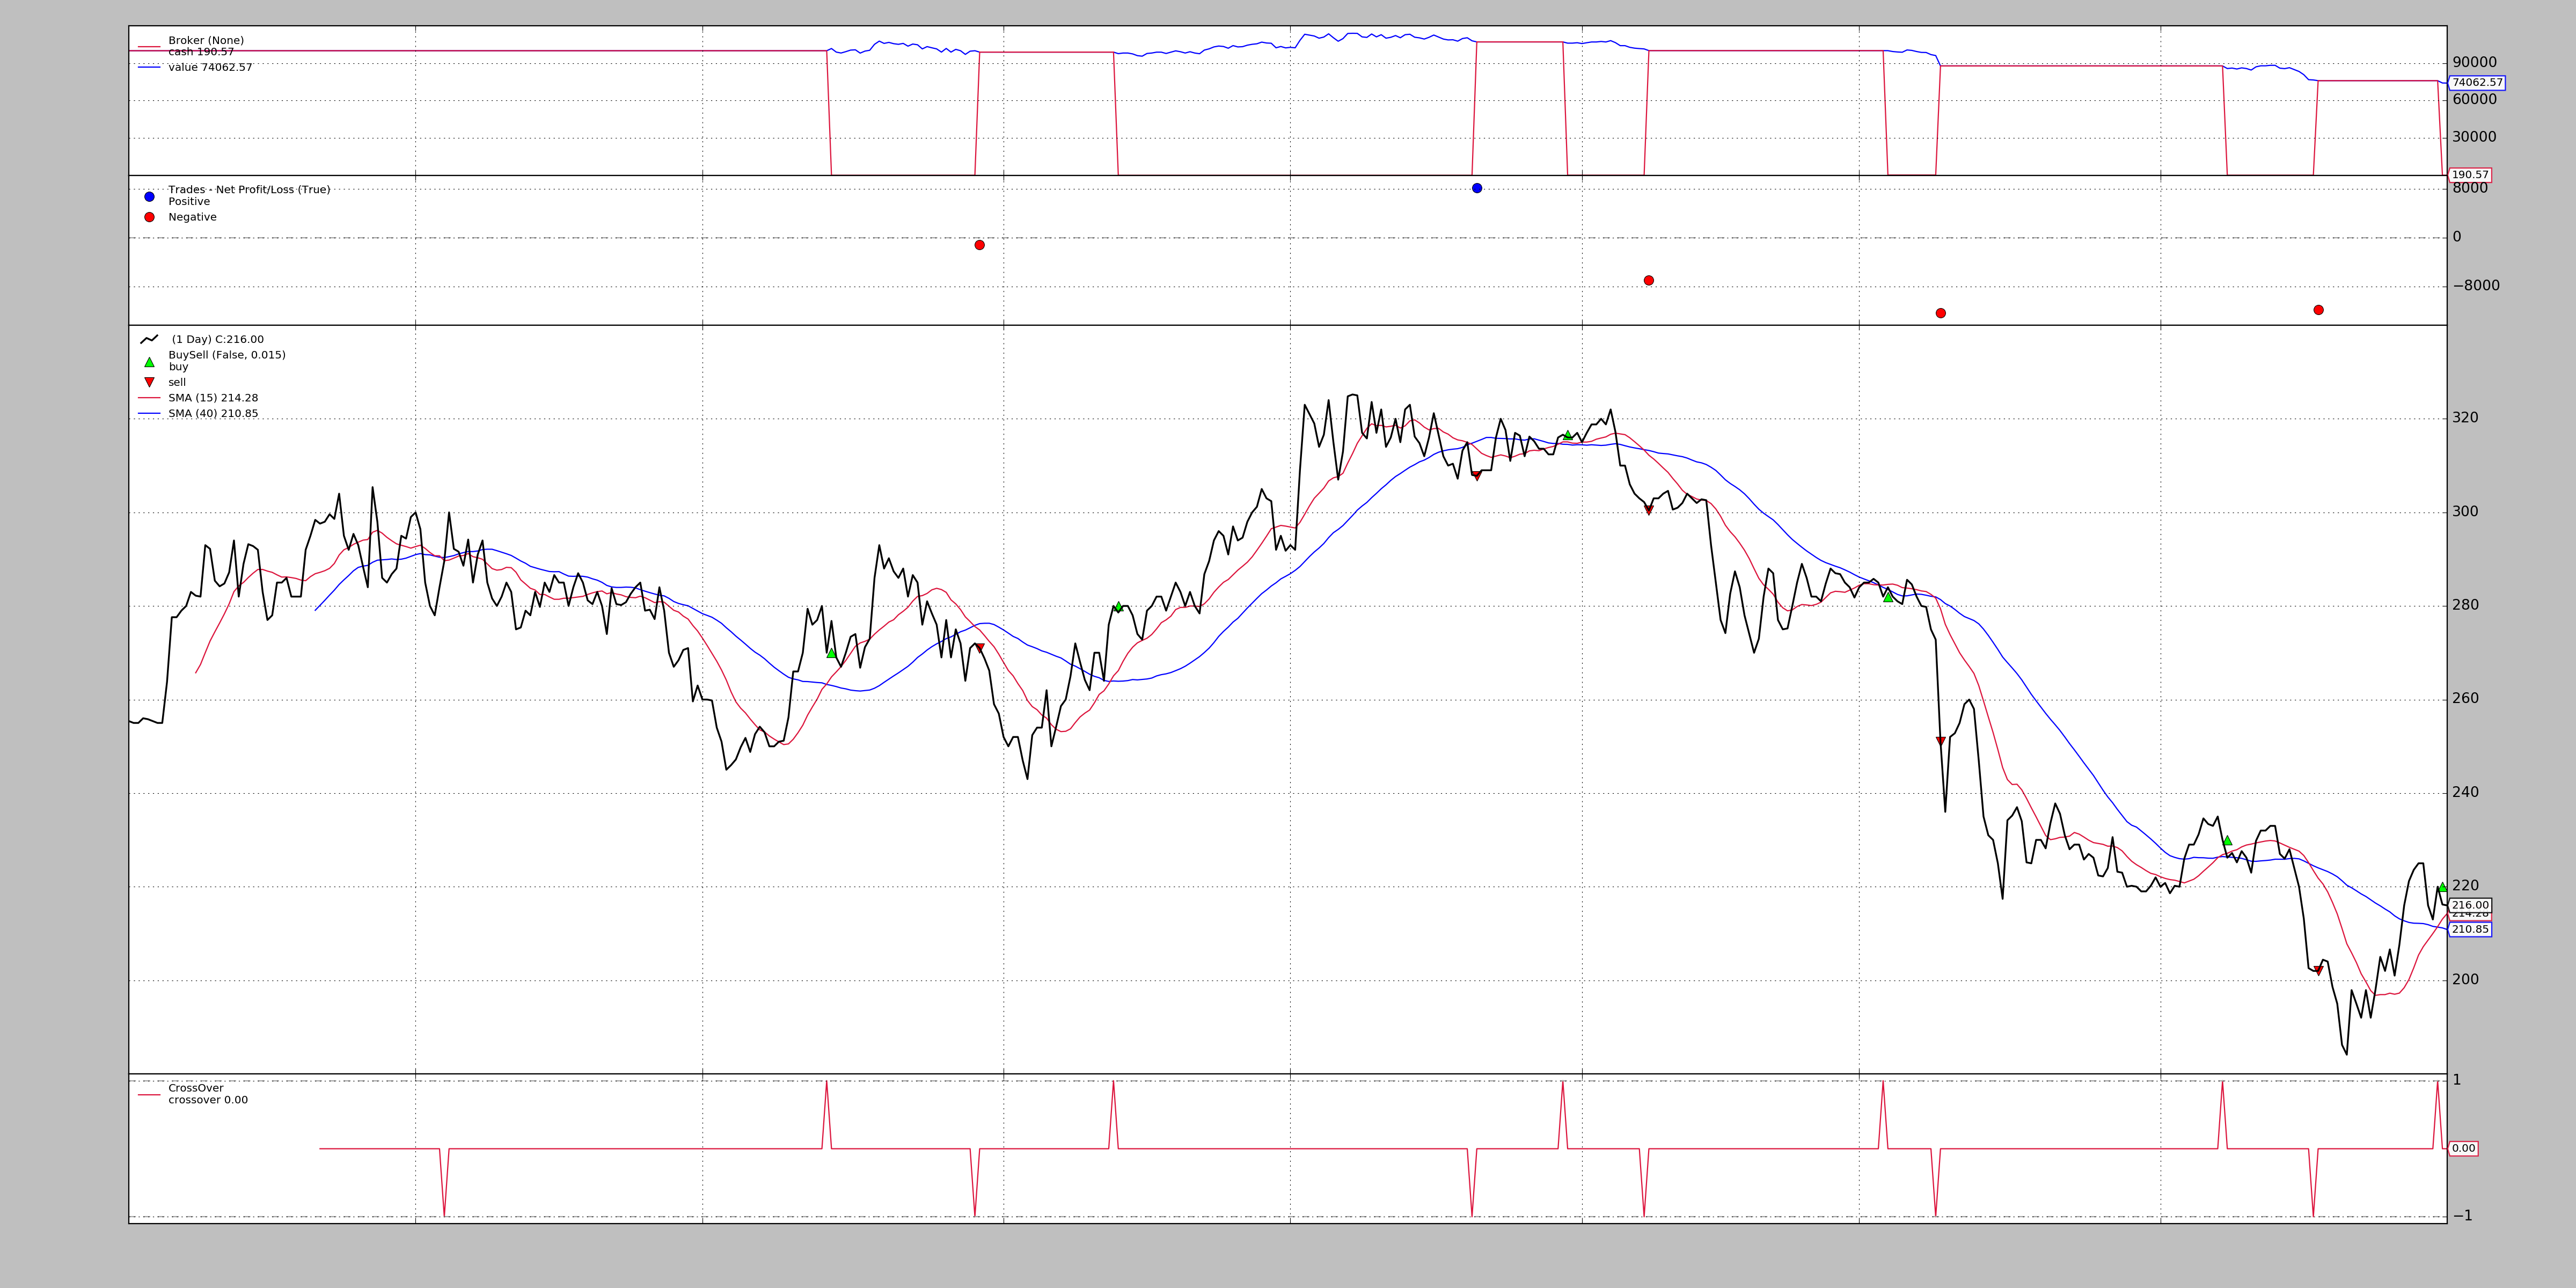

strat_id  init_cash  buy_prop  sell_prop  commission  stop_loss  \
0         0     100000         1          1      0.0075          0   

   stop_trail execution_type channel symbol  ...   rnorm100  len   drawdown  \
0           0          close                 ... -14.417584  229  35.011684   

  moneydown                                                max  maxdrawdown  \
0  39900.33  {'len': 229, 'drawdown': 35.011684394914624, '...    35.011684   

   maxdrawdownperiod  sharperatio       pnl  final_value  
0                229    -0.914732 -25937.43   74062.5675  

[1 rows x 29 columns]

In [19]:
backtest('smac', jfc, fast_period=15, slow_period=40)

## Improve our SMAC strategy


Increase both the fast period and the slow period
This shows how small changes can quickly turn a winning strategy into a losing one. Our final portfolio value went down from PHP 100,412 to PHP 83,947 (PHP 16,465 decrease), after increasing both fast_period, and slow_period to 30, and 50, respectively.

Starting Portfolio Value: 100000.00
2019-12-27, ===Global level arguments===
2019-12-27, init_cash : 100000
2019-12-27, buy_prop : 1
2019-12-27, sell_prop : 1
2019-12-27, commission : 0.0075
2019-12-27, stop_loss : 0
2019-12-27, stop_trail : 0
===Strategy level arguments===
fast_period : 30
slow_period : 50
2019-12-27, Final Portfolio Value: 63006.24249999999
2019-12-27, Final PnL: -36993.76
Time used (seconds): 0.26883912086486816
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['smac']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	commission:0.0075	stop_loss:0	stop_trail:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add_cash_amount:0	add_cash_freq:M	fast_period:30	slow_period:50
Returns	rtot:-0.4619363772037938	ravg:-0.0009504863728473124	rnorm:-0.21299648634628135	rnorm100:-21.299648634628134
Sharpe	sharperatio:-4.835662823103

<IPython.core.display.Javascript object>


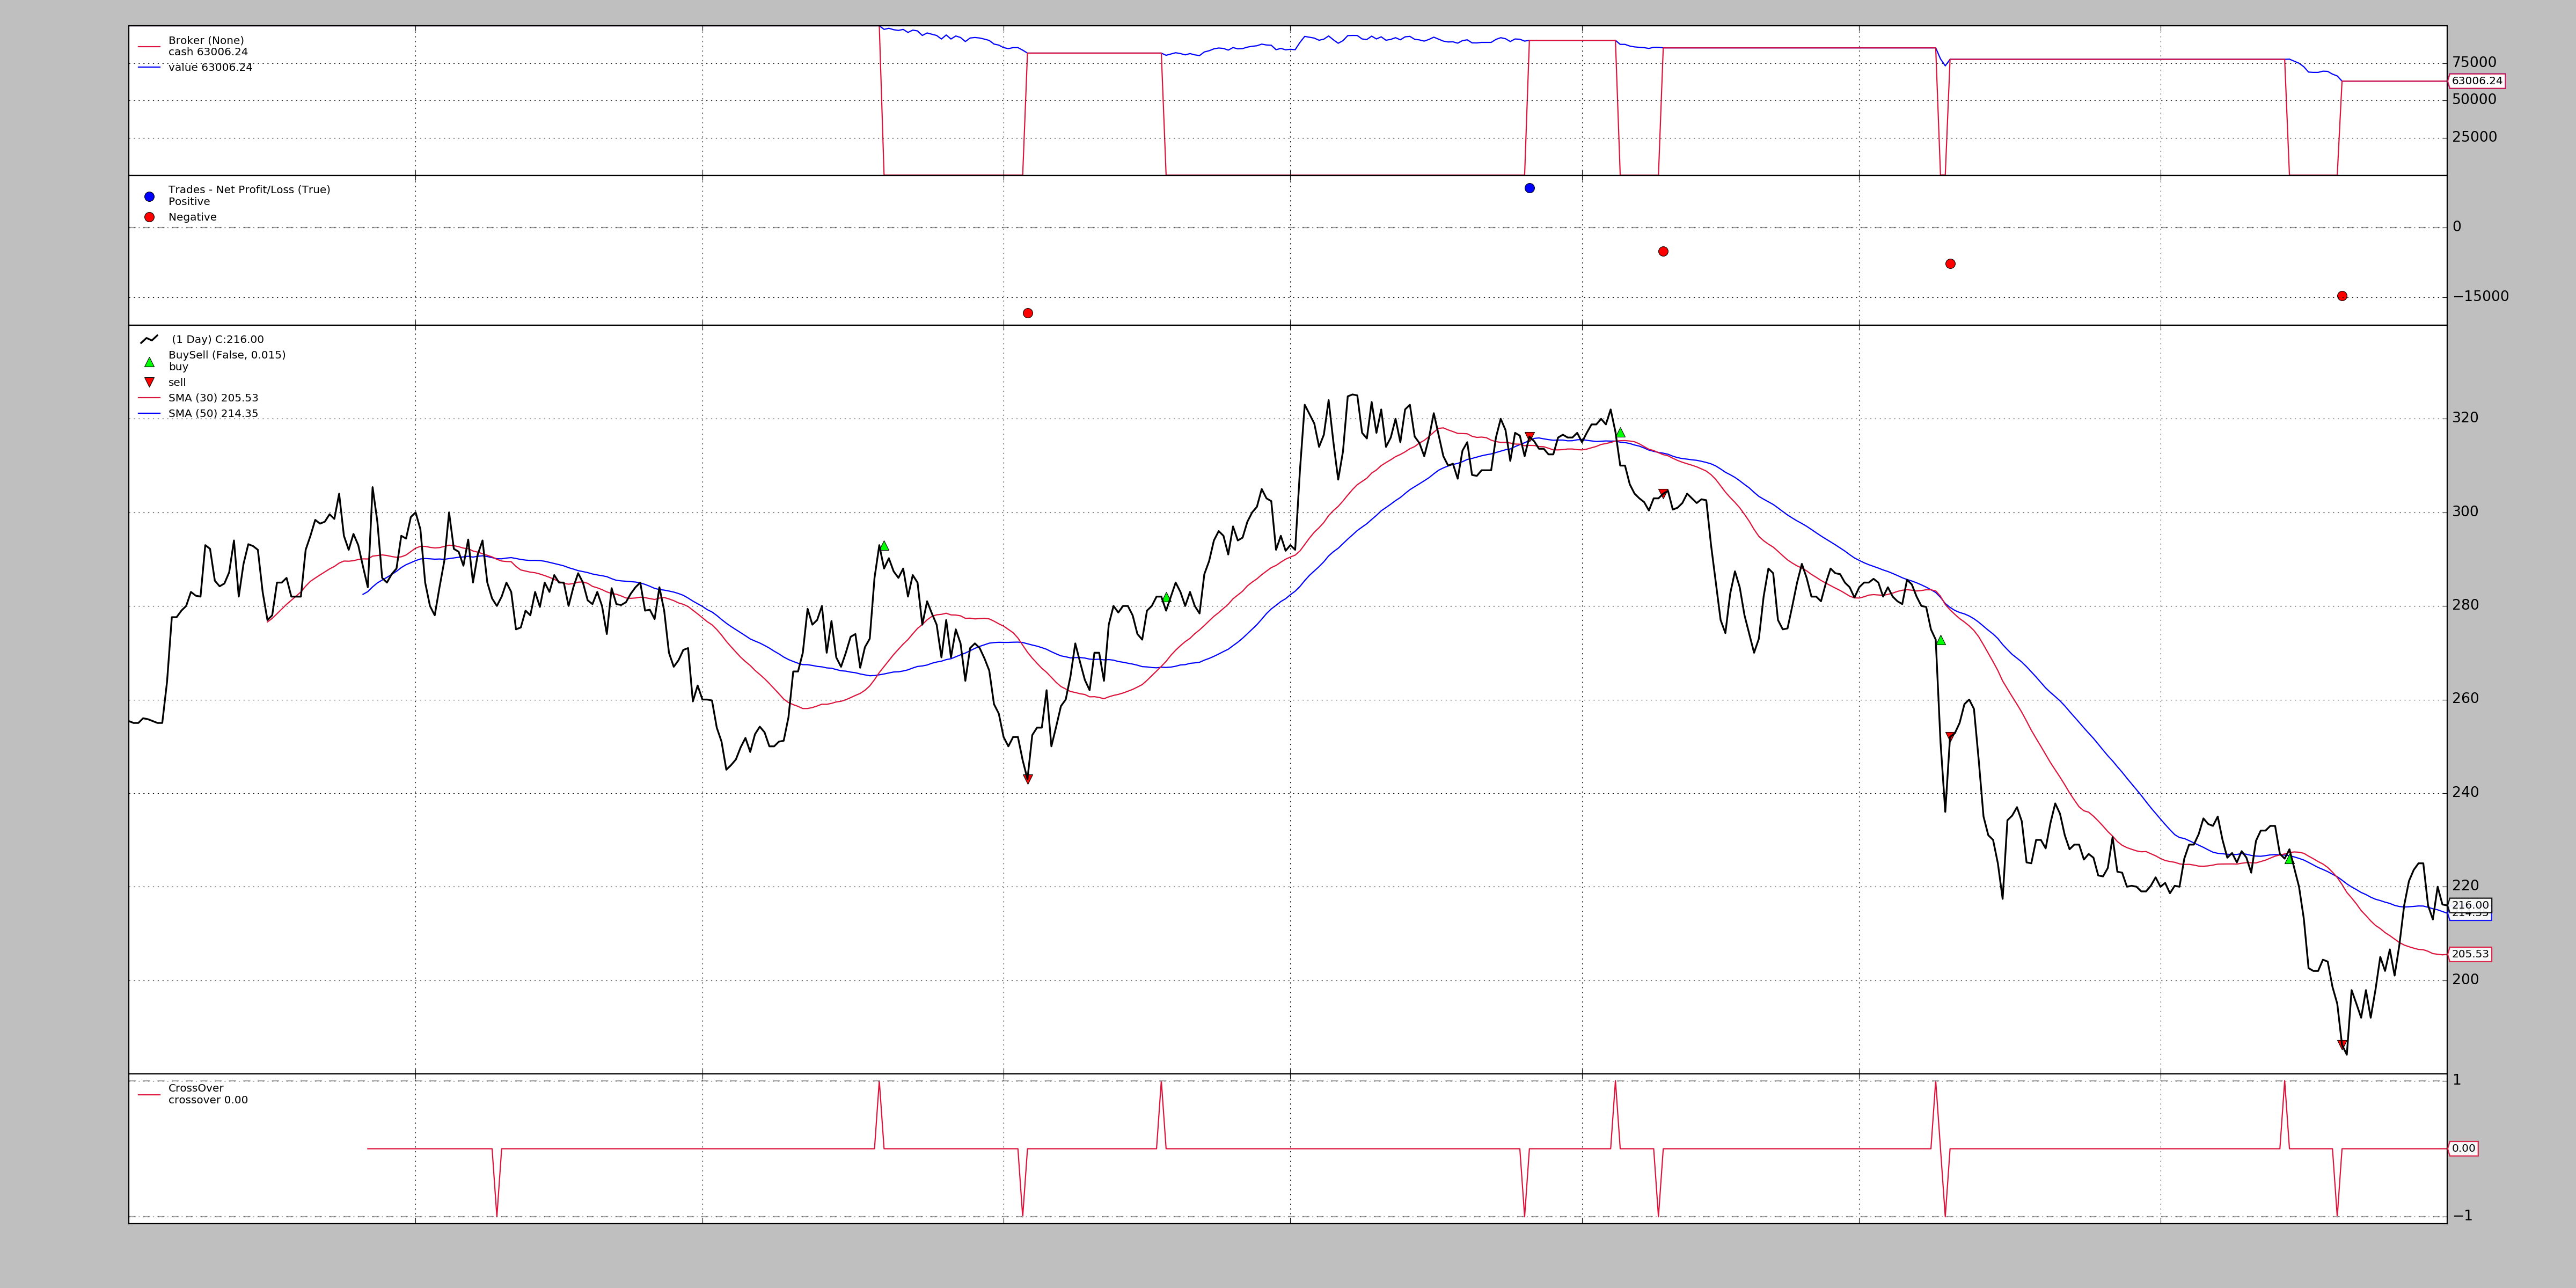

strat_id  init_cash  buy_prop  sell_prop  commission  stop_loss  \
0         0     100000         1          1      0.0075          0   

   stop_trail execution_type channel symbol  ...   rnorm100  len   drawdown  \
0           0          close                 ... -21.299649  328  36.993758   

    moneydown                                                max  maxdrawdown  \
0  36993.7575  {'len': 328, 'drawdown': 36.99375750000001, 'm...    36.993758   

   maxdrawdownperiod  sharperatio       pnl  final_value  
0                328    -4.835663 -36993.76   63006.2425  

[1 rows x 29 columns]

In [21]:
backtest('smac', jfc, fast_period=30, slow_period=50)

## Decrease the slow period while keeping the fast period the same

In this case, the performance of our strategy actually improved! Our final portfolio value went up from PHP 100,412 to PHP 102,273 (PHP 1,861 increase), after decreasing the slow period to 35, and keeping the fast period the same at 15.


Starting Portfolio Value: 100000.00
2019-12-27, ===Global level arguments===
2019-12-27, init_cash : 100000
2019-12-27, buy_prop : 1
2019-12-27, sell_prop : 1
2019-12-27, commission : 0.0075
2019-12-27, stop_loss : 0
2019-12-27, stop_trail : 0
===Strategy level arguments===
fast_period : 15
slow_period : 35
2019-12-27, Final Portfolio Value: 81474.943
2019-12-27, Final PnL: -18525.06
Time used (seconds): 0.1674811840057373
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['smac']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	commission:0.0075	stop_loss:0	stop_trail:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add_cash_amount:0	add_cash_freq:M	fast_period:15	slow_period:35
Returns	rtot:-0.2048746608658155	ravg:-0.0004215528001354228	rnorm:-0.10078336985386116	rnorm100:-10.078336985386116
Sharpe	sharperatio:-1.0610418247203028
Draw

<IPython.core.display.Javascript object>


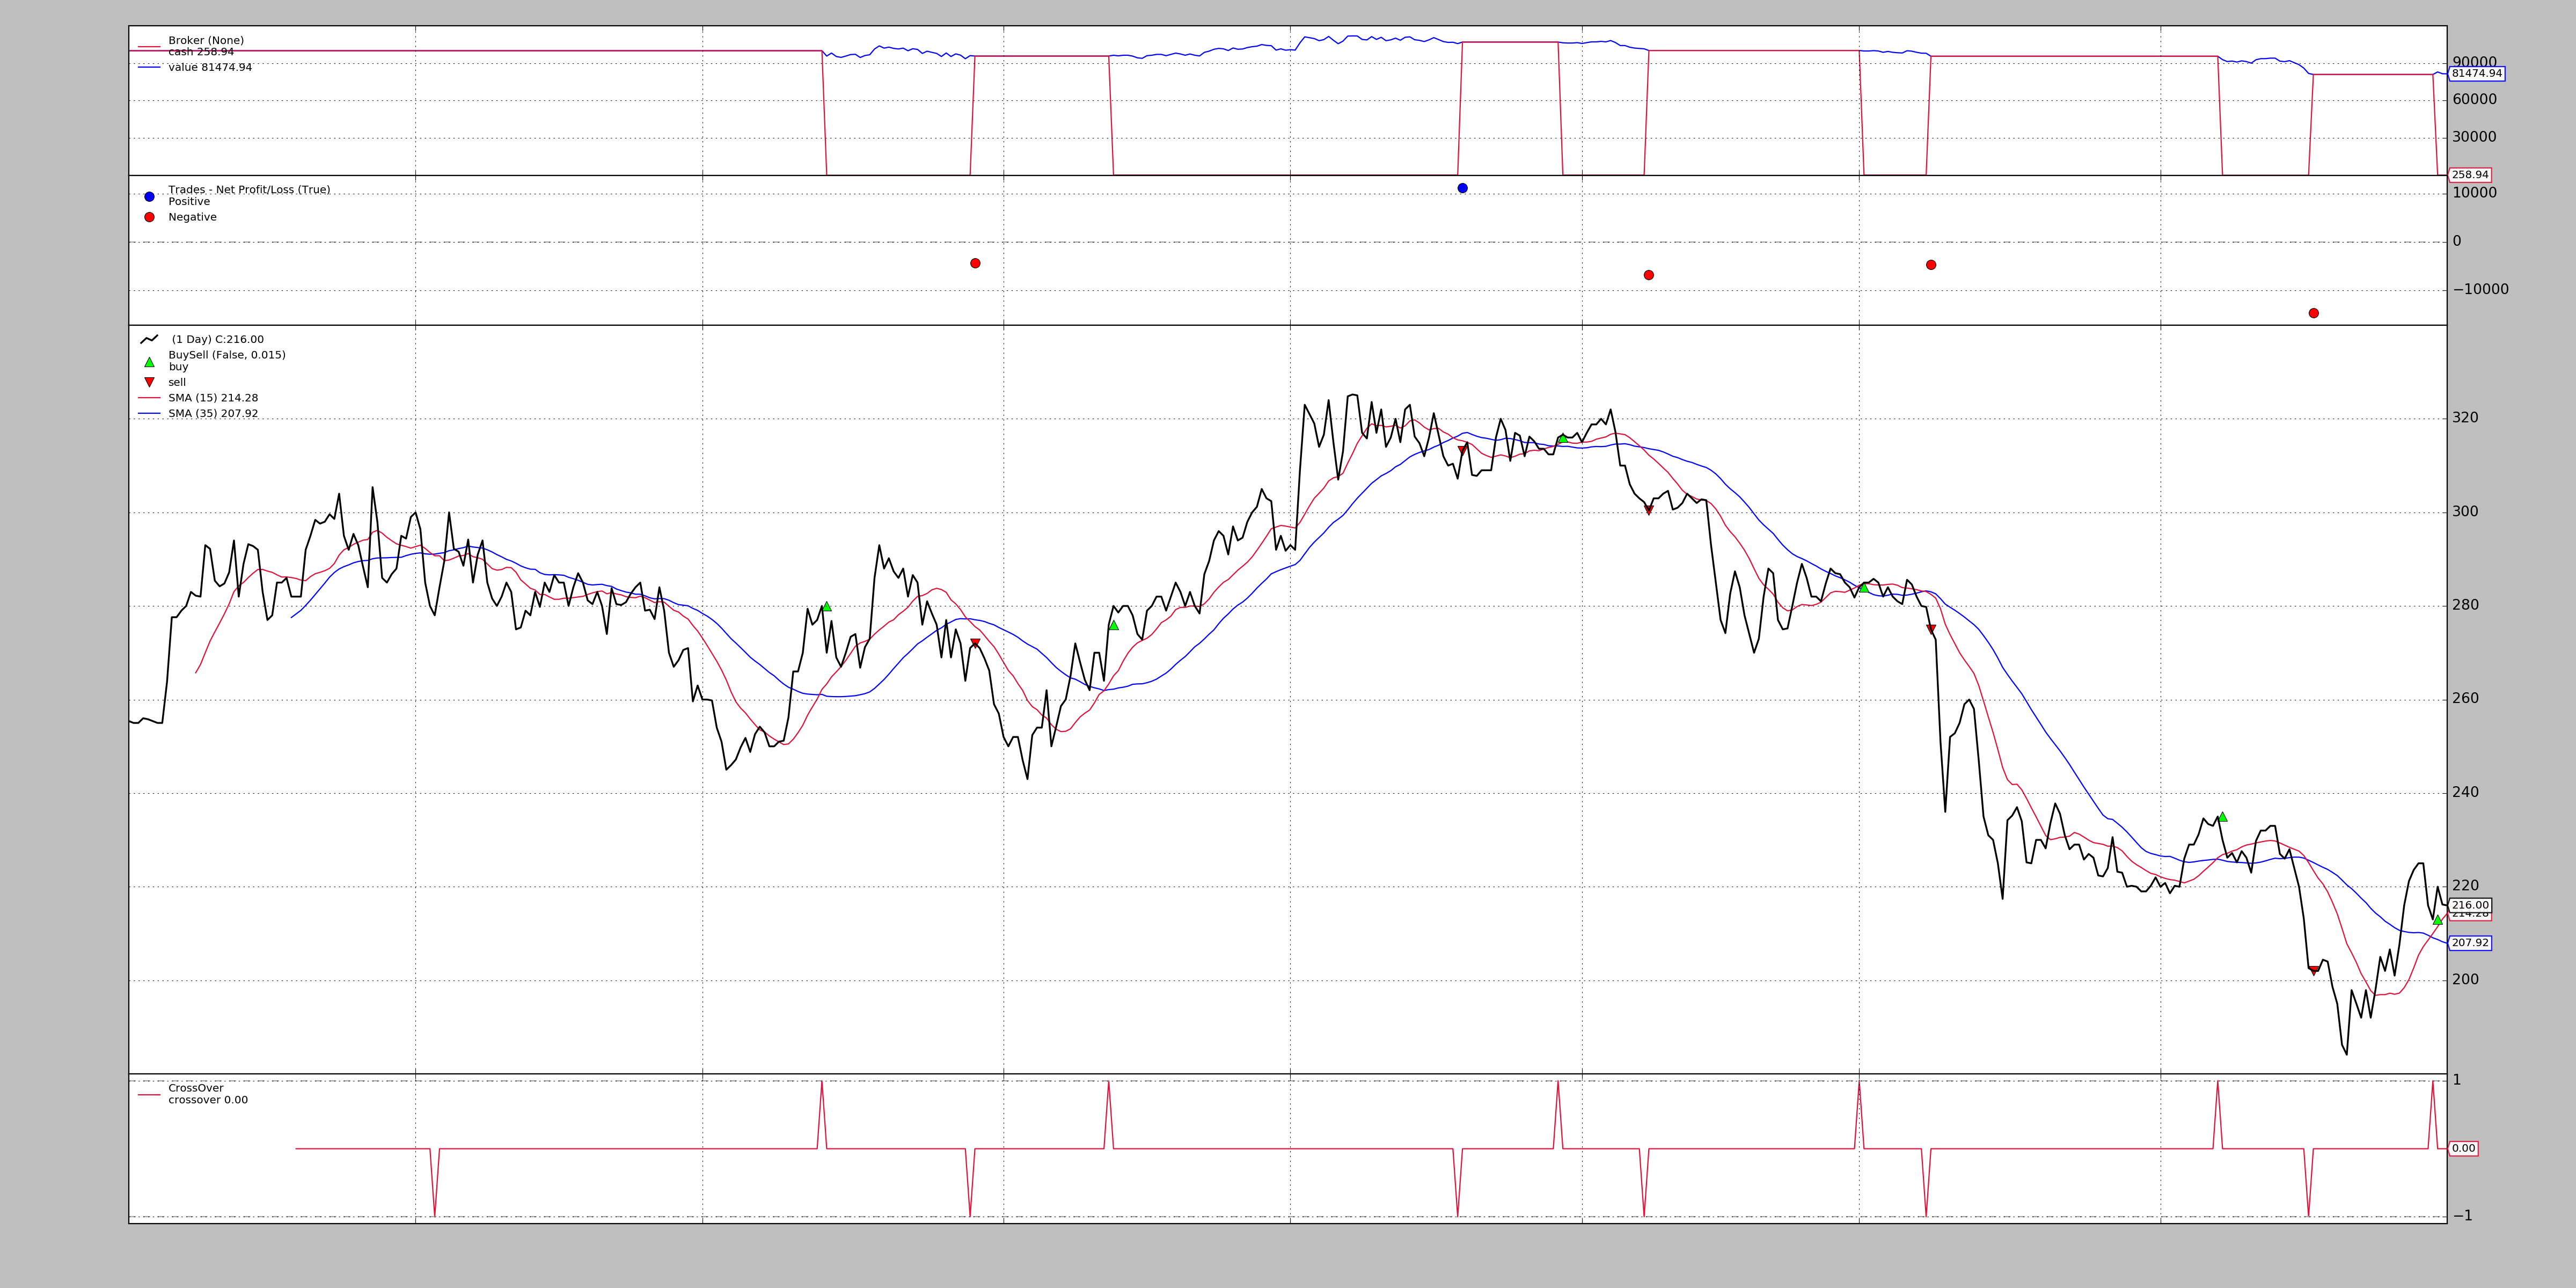

strat_id  init_cash  buy_prop  sell_prop  commission  stop_loss  \
0         0     100000         1          1      0.0075          0   

   stop_trail execution_type channel symbol  ...   rnorm100  len   drawdown  \
0           0          close                 ... -10.078337  229  27.168698   

   moneydown                                                max  maxdrawdown  \
0  30393.087  {'len': 229, 'drawdown': 27.640092526881897, '...    27.640093   

   maxdrawdownperiod  sharperatio       pnl  final_value  
0                229    -1.061042 -18525.06    81474.943  

[1 rows x 29 columns]

In [26]:
backtest('smac', jfc, fast_period=15, slow_period=35)

## Overcome the limitations of backtesting

Now, does this mean we should go ahead and trade JFC using the best performing SMAC strategy? Maybe not just yet.
Backtesting has quite a few limitations and overcoming them will often require additional steps to increase our confidence in the reliability of our backtest’s results & recommendations.
Below are two of backtesting’s limitations followed by safeguards to overcome them:



## Overfitting
This refers to the situation where the “optimal parameters” that you derived were fit too much to the patterns of a previous time period. This means that the expected profitability of your strategy will not translate to actual profitability in the future when you decide to use it.
One safeguard for this would be to test your strategies out-of-sample, which is similar to using a “test set” in machine learning. The idea is that you hold out some data, that you only use once later when you want to assess the profitability of your trading strategy. This way, it’s harder to overfit your parameters since you’re not optimizing your strategy based on that dataset.


## Look ahead bias
This is the bias that results from utilizing information during your backtest that would not have been available during the time period being tested. For example, you could be testing the effectiveness of a strategy on JFC that assumes that you would have known about its financial performance (e.g. net income) a month before it was actually made available publicly. This would give you unreliable confidence in your strategy that could lose you a lot of money later.
In this case, one of the best things you can do to avoid this bias is to thoroughly validate the assumptions that you make when you’re backtesting your strategy. It pays to rigorously assess your strategy, and the information that has to be available for the strategy to be properly executed.


These are only 2 of the many limitations that come with backtesting. 
After addressing the above limitations, we should be more confident in our chosen strategy; however, do remember that while we can be more confident with our strategy, its performance in the unseen real world will never be 100% for sure.
I recommend that once you adopt a strategy in the real world, start off with a relatively small amount of money and only increase it as the strategy shows more consistent success; otherwise, be ready to kill it in the case that it’s proven to work poorly in the real world.


## Take note of fastquant’s default parameters

### “get_stock_data” function
To make the “get_stock_data” function as simple as possible to use, we’ve designed it to only return the closing price of the stock (used for most trading strategies), which follows the format “c” (c = closing price). But, if you want to have more pricing data points (e.g. OHLCV for “open”, “high”, “low”, “close”, “volume”), just set the “format” argument in “get_stock_data” to your desired data format.
Example below for the format (OHLCV) for Tesla stock:


In [28]:
tsla = get_stock_data("TSLA", "2018-01-01", "2019-01-01", format="ohlcv")

[*********************100%***********************]  1 of 1 completed


In [29]:
tsla.head()

open       high        low      close    volume
dt                                                              
2018-01-02  62.400002  64.421997  62.200001  64.106003  21761000
2018-01-03  64.199997  65.050003  63.110001  63.450001  22607500
2018-01-04  62.574001  63.709999  61.136002  62.924000  49731500
2018-01-05  63.324001  63.448002  62.400002  63.316002  22956000
2018-01-08  63.200001  67.403999  63.099998  67.281998  49297000

In [31]:
spy = get_stock_data('SPY','2016-01-01','2021-01-01',format='ohlcv')

[*********************100%***********************]  1 of 1 completed


Starting Portfolio Value: 100000.00
2020-12-31, ===Global level arguments===
2020-12-31, init_cash : 100000
2020-12-31, buy_prop : 1
2020-12-31, sell_prop : 1
2020-12-31, commission : 0.0075
2020-12-31, stop_loss : 0
2020-12-31, stop_trail : 0
===Strategy level arguments===
fast_period : 15
slow_period : 35
2020-12-31, Final Portfolio Value: 117425.16512687685
2020-12-31, Final PnL: 17425.17
Time used (seconds): 0.5918350219726562
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['smac']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	commission:0.0075	stop_loss:0	stop_trail:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add_cash_amount:0	add_cash_freq:M	fast_period:15	slow_period:35
Returns	rtot:0.16063105215669607	ravg:0.00012748496202912387	rnorm:0.032647828008697595	rnorm100:3.2647828008697597
Sharpe	sharperatio:0.261911928142890

<IPython.core.display.Javascript object>


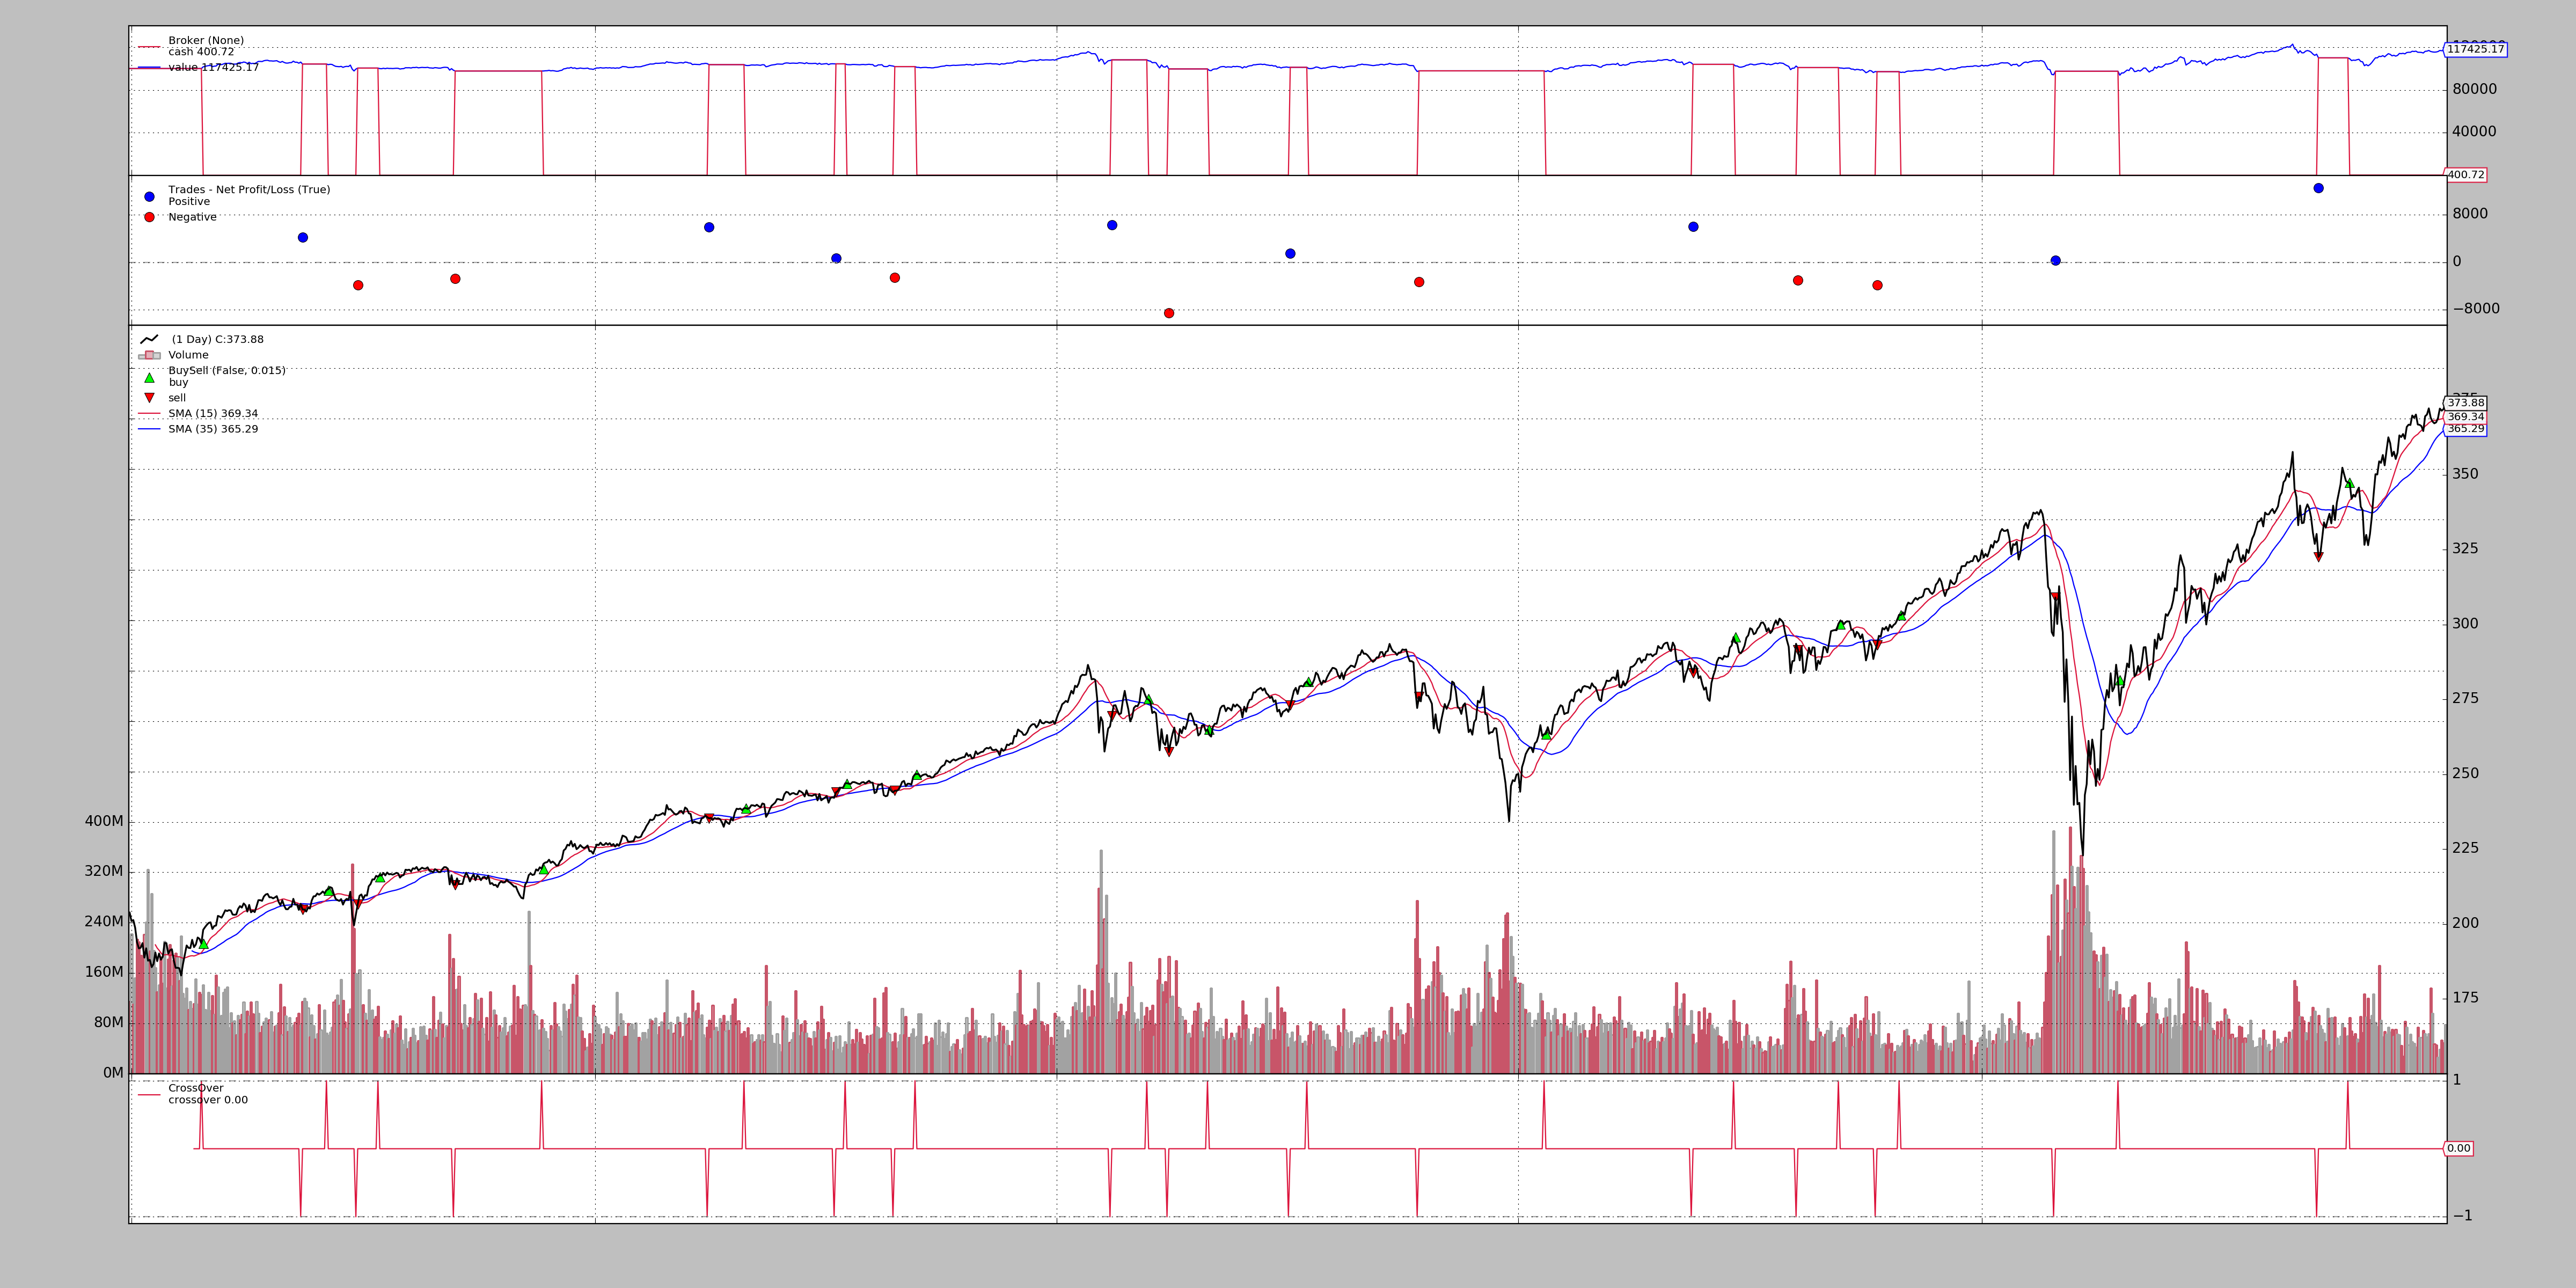

strat_id  init_cash  buy_prop  sell_prop  commission  stop_loss  \
0         0     100000         1          1      0.0075          0   

   stop_trail execution_type channel symbol  ...  rnorm100  len  drawdown  \
0           0          close                 ...  3.264783   83  4.407689   

     moneydown                                                max  \
0  5414.385322  {'len': 639, 'drawdown': 18.99128150649127, 'm...   

   maxdrawdown  maxdrawdownperiod  sharperatio       pnl    final_value  
0    18.991282                639     0.261912  17425.17  117425.165127  

[1 rows x 29 columns]

In [35]:
backtest('smac', spy, fast_period=15, slow_period=35)


## “backtest” function

For the “backtest” function, we also assume values for the proportion of your cash you use when you buy (buy_prop) as 1 (100%), the proportion of your stock holding you sell (sell_prop) as 1 (100%), and the commission per transaction (commission) to be 0.75%. You can edit these defaults by setting the values in the arguments in parentheses.
Example below where I backtest Tesla assuming buy_prop = 50%, sell_prop = 50% and commission_per_transaction = 1%.

Starting Portfolio Value: 100000.00
2018-12-31, ===Global level arguments===
2018-12-31, init_cash : 100000
2018-12-31, buy_prop : 0.5
2018-12-31, sell_prop : 0.5
2018-12-31, commission : 0.01
2018-12-31, stop_loss : 0
2018-12-31, stop_trail : 0
===Strategy level arguments===
rsi_period : 14
rsi_upper : 70
rsi_lower : 30
2018-12-31, Final Portfolio Value: 139338.36938301087
2018-12-31, Final PnL: 39338.37
Time used (seconds): 0.11107420921325684
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['rsi']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:0.5	sell_prop:0.5	commission:0.01	stop_loss:0	stop_trail:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add_cash_amount:0	add_cash_freq:M	rsi_period:14	rsi_upper:70	rsi_lower:30
Returns	rtot:0.3317351011125876	ravg:0.0013216537892931776	rnorm:0.3952264821648476	rnorm100:39.52264821648476
Sharpe	sharpera

<IPython.core.display.Javascript object>


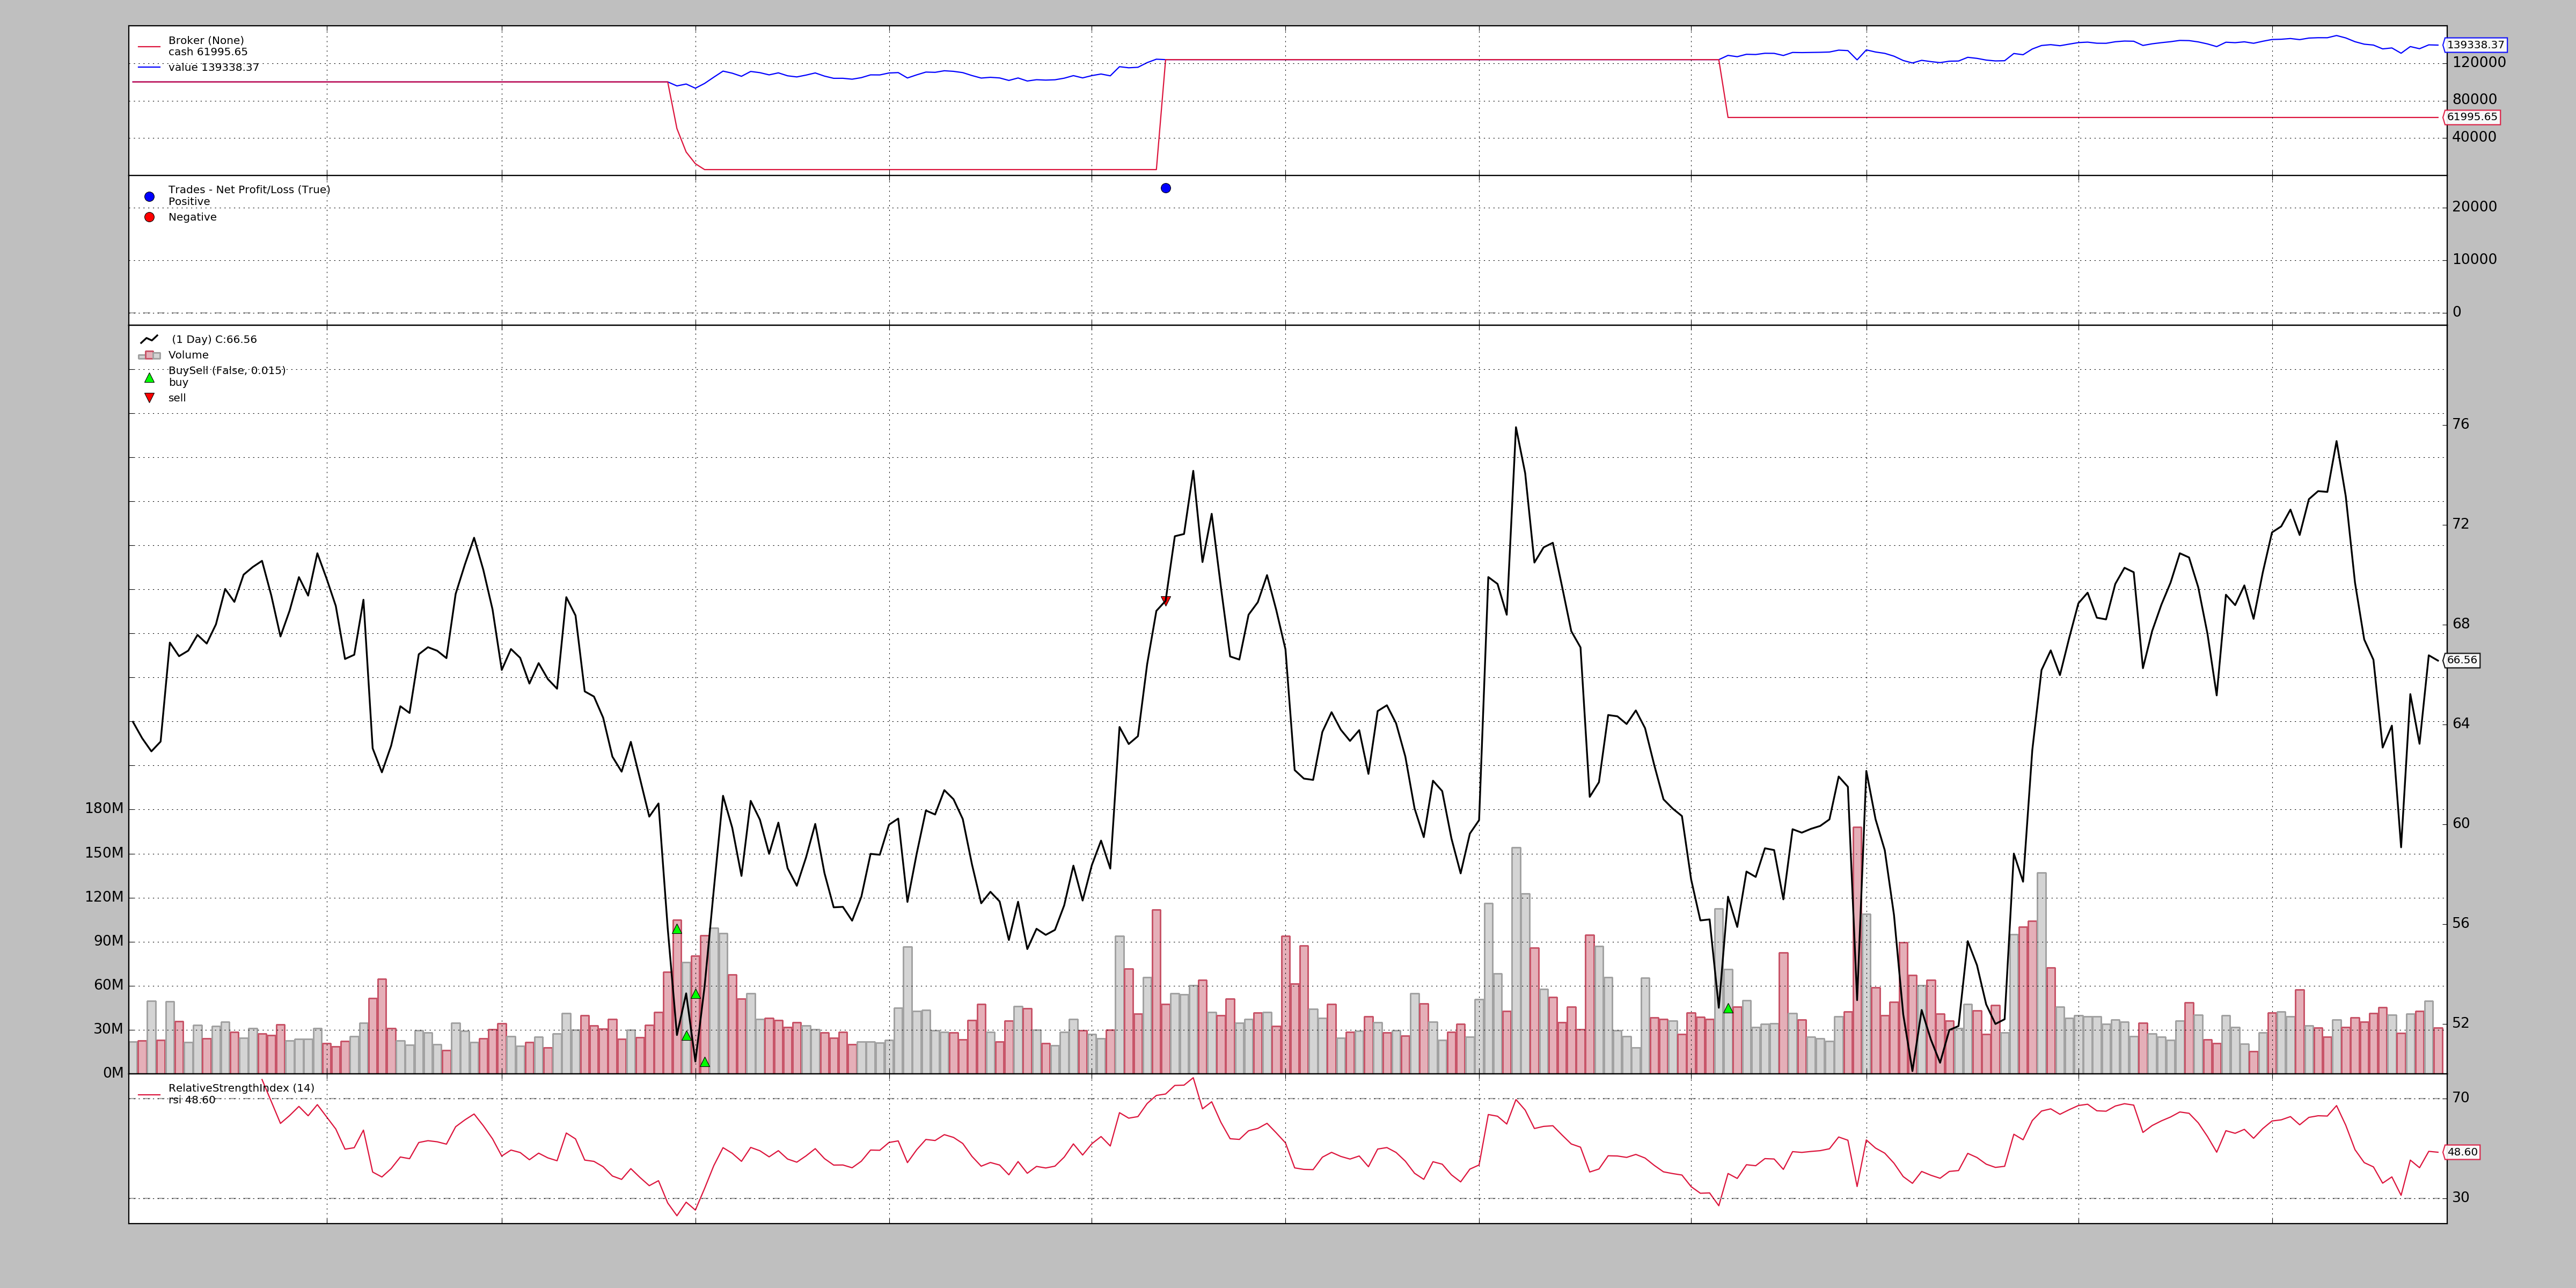

strat_id  init_cash  buy_prop  sell_prop  commission  stop_loss  \
0         0     100000       0.5        0.5        0.01          0   

   stop_trail execution_type channel symbol  ...   rnorm100  len  drawdown  \
0           0          close                 ...  39.522648   11  6.835496   

      moneydown                                                max  \
0  10223.280823  {'len': 61, 'drawdown': 12.648538571348306, 'm...   

   maxdrawdown  maxdrawdownperiod  sharperatio       pnl    final_value  
0    12.648539                 61         None  39338.37  139338.369383  

[1 rows x 30 columns]

In [38]:
backtest("rsi", tsla, buy_prop=0.50, sell_prop=0.50, commission=0.01)

Remember that fastquant has as many strategies as are present in its existing library of strategies. There are 8 strategy types to choose from so far — including the Simple Moving Average Crossover (SMAC), Relative Strength Index (RSI), and even a sentiment analysis based strategy!